The metric we have chosen for this project is the healthiest neighborhood in Pittsburgh in order to decide who will be recruited to a utopian society on Neptune. In order to decide which neighborhood is the healthiest, I will be focusing on the health of children in Pittsburgh. While children may not initially seem to be an important factor in the general health of a neighborhood, in order to recruit larger families to out new society, we would need their children to be healthy too. One way to measure this would be by the physical activity of children and one way to measure physical activity is by measuring the amount of playgrounds per neighborhood. Some other metrics I considered looking at were parks in general as well as public fitness locations, such as pools or gyms. In the end however, I decided to go with playgrounds so that I could focus on the specific demographic of children.

The metric I am focusing on is playgrounds per neighborhood. I will be measuring the amount of playgrounds per neighborhood as well as the amount of children enrolled in schools per neighborhood. In theory, the more playgrounds per neighborhood, the more children will be outside engaging in physcial activity, and the more times children are engaging in physical activity, the more healthier they will be. The dataset I will be using for this then will be playgrounds per neighborhood.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
pg=pd.read_csv("playgrounds.tsv", sep='\t')

In [8]:
pg.head()

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064


In [108]:
p=pg.groupby("neighborhood").count()
p
#new dataframe organized by amount of parks per neighborhood

,id,name,type,maintenance_responsibility,park,street,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,
Allegheny Center,4,4,0,4,4,4,4,4,4,4,4,4,4,4,4,4
Allentown,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
Banksville,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
Bedford Dwellings,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
Beechview,5,5,0,5,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,3,3,0,2,3,3,2,3,3,3,3,3,3,3,3,3
West End,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
West Oakland,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1


Text(0, 0.5, 'Number of Playgrounds')

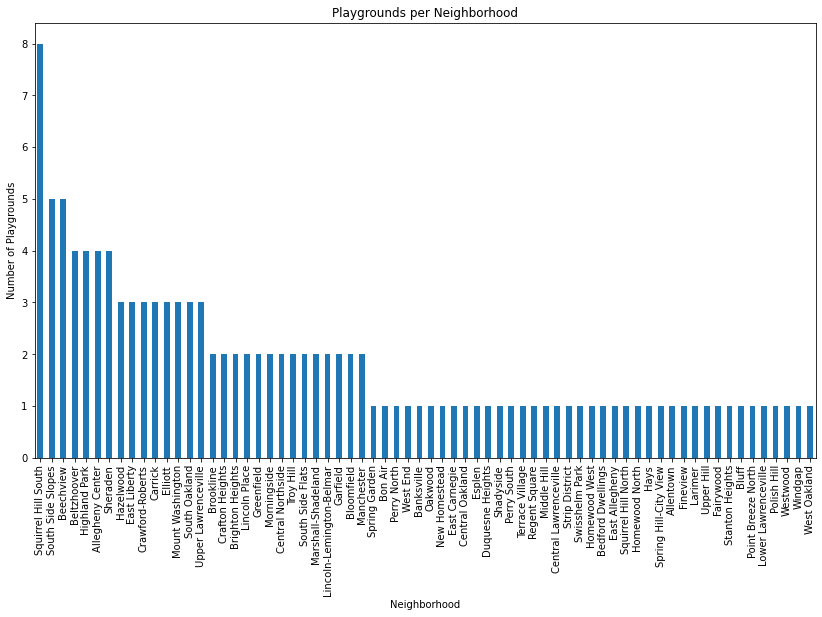

In [20]:
pg['neighborhood'].value_counts().plot( kind='bar', figsize=(14,8) )
plt.title("Playgrounds per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Playgrounds")
#bar graph of the amount of parks per neighborhood

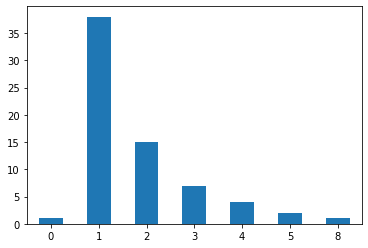

In [59]:
p["park"].value_counts().sort_index().plot(kind='bar', rot=0)
#amount of neighborhoods that have certain amount of parks, interesting to see

So, by this analysis, I can conclude that the neighborhood with the most parks is Squirrel Hill North with eight parks. Thus, by the metric described earlier, this would be the healthiest neighborhood by this dataset. The two neighborhoods after that would be Beechview and South Side Slopes with five parks.

Most neighborhoods only have one park, with 39 neighborhoods included in the dataset only having one. 15 neighborhoods have two parks, eight neighborhoods have three parks, four neighborhoods have four parks, two neighborhoods have five parks, and only one neighborhood has eight parks.

While I do not know much about Pittsburgh neighborhoods, I have heard that Squirrel Hill North is a generally nice neighborhood, and from the few times I have visited it, I would agree. The neighborhood is mostly suburban, so it would make sense that there are a lot of playgrounds. However, many of the other neighborhoods included are also suburban, and considering how many more parks Squirrel Hill North has than other neighborhoods, I think it is safe to say that it is the healthiest neighborhood in terms of physical activity in children.